In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('/content/Covid_19.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df.shape

(49068, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [20]:
df.rename(columns={
    "Province/State":"State",
    "Country/Region":"Country"},inplace=True)
df


,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [21]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [22]:
df['Date'].max()

'2020-07-27'

In [23]:
top_date=df[df['Date']=='2020-07-27']

In [24]:
top_date.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa
48812,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-07-27,86,3,65,18,Americas
48813,NaN,Argentina,-38.41610,-63.616700,2020-07-27,167416,3059,72575,91782,Americas
48814,NaN,Armenia,40.06910,45.038200,2020-07-27,37390,711,26665,10014,Europe
48815,Australian Capital Territory,Australia,-35.47350,149.012400,2020-07-27,113,3,109,1,Western Pacific
48816,New South Wales,Australia,-33.86880,151.209300,2020-07-27,3699,49,2989,661,Western Pacific


In [25]:
top_date.groupby(['Country'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [26]:
confirmed_cases=df.groupby(['Date'])['Confirmed'].sum().reset_index()
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


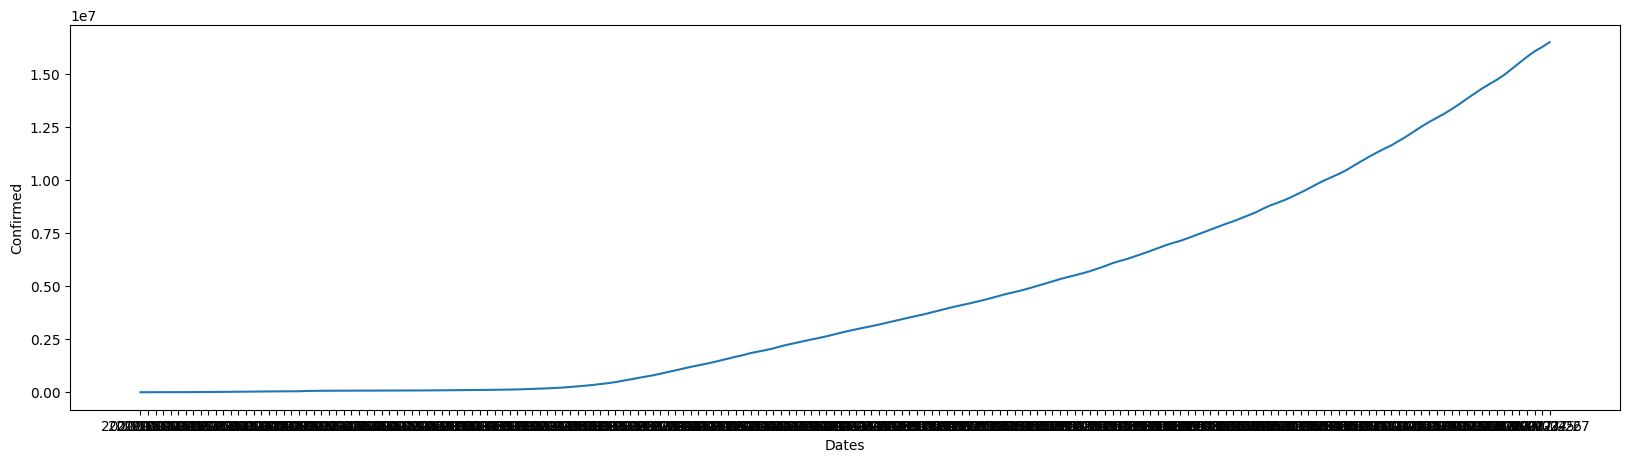

In [27]:
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed_cases,x='Date',y='Confirmed')
plt.xlabel('Dates')
plt.ylabel('Confirmed')
plt.show()

In [28]:
# from sujeet nag to everyone:    8:42 PM
death_cases = df.groupby(['Date'])['Deaths'].sum().reset_index()
death_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


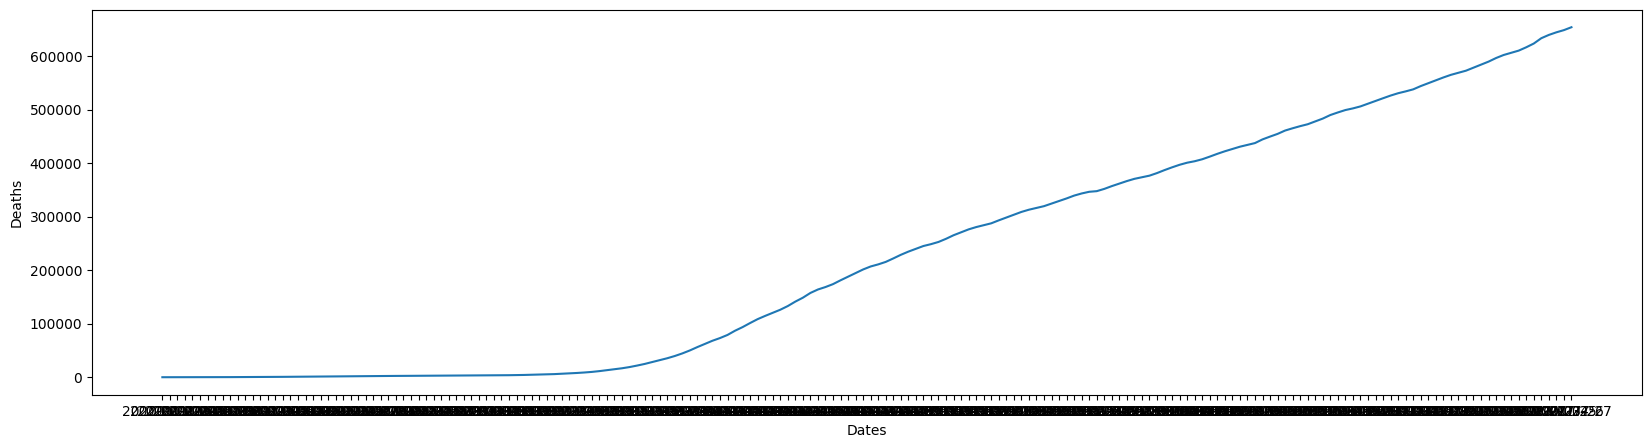

In [29]:
plt.figure(figsize=(20,5))
sns.lineplot(data=death_cases,x='Date',y='Deaths')
plt.xlabel('Dates')
plt.ylabel('Deaths')
plt.show()

In [30]:
# from Vibhor Mittal to everyone:    8:44 PM
recovered_cases = df.groupby(['Date'])['Recovered'].sum().reset_index()
recovered_cases

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


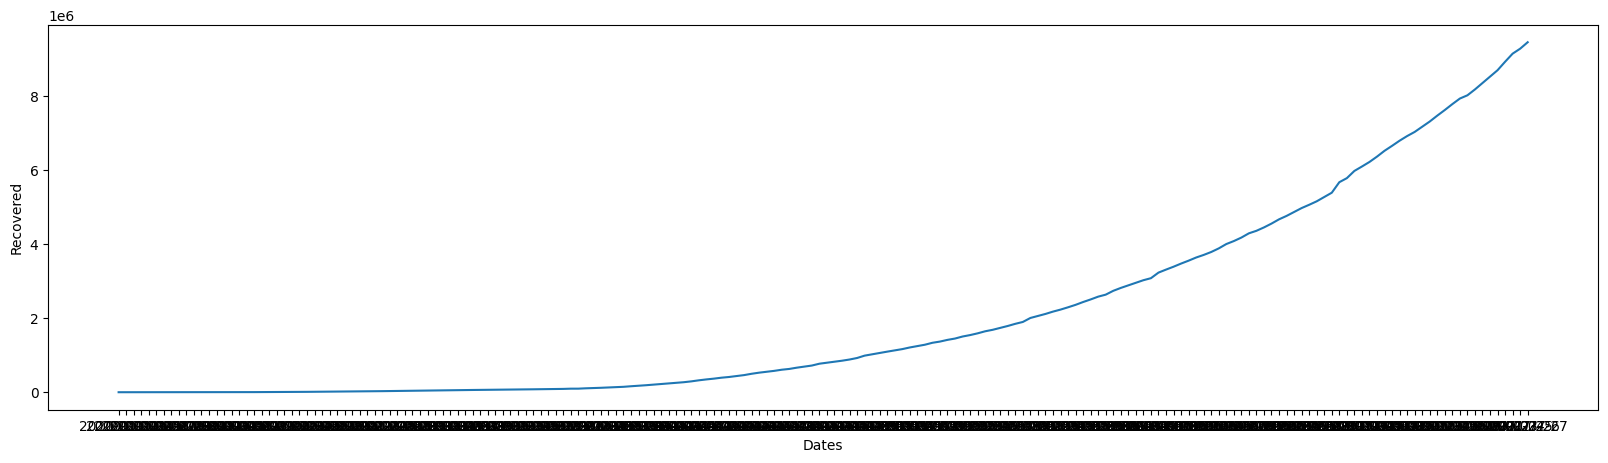

In [31]:
plt.figure(figsize=(20,5))
sns.lineplot(data=recovered_cases,x='Date',y='Recovered')
plt.xlabel('Dates')
plt.ylabel('Recovered')
plt.show()

In [32]:
# from Manish Mohan to everyone:    8:46 PM
active_cases=df.groupby(['Date'])['Active'].sum().reset_index()
active_cases

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


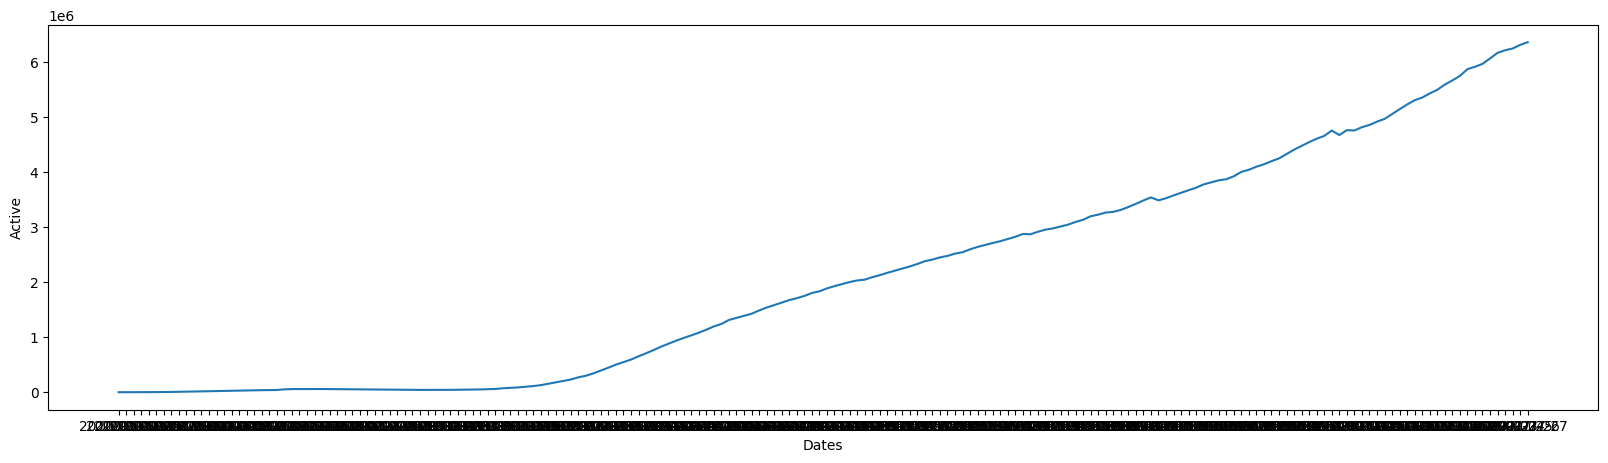

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(data=active_cases,x='Date',y='Active')
plt.xlabel('Dates')
plt.ylabel('Active')
plt.show()

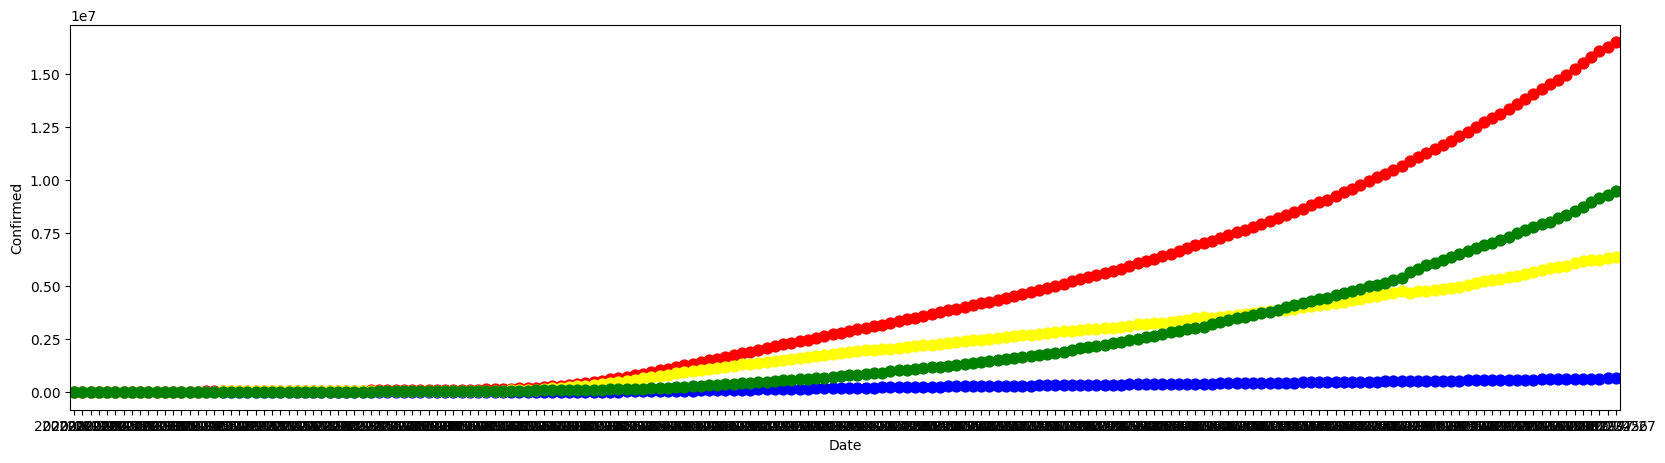

In [34]:
plt.figure(figsize=(20,5))
sns.pointplot(data=confirmed_cases,x='Date',y='Confirmed',color='Red')
sns.pointplot(data=death_cases,x='Date',y='Deaths',color='Blue')
sns.pointplot(data=active_cases,x='Date',y='Active',color='Yellow')
sns.pointplot(data=recovered_cases,x='Date',y='Recovered',color='Green')
# plt.xlabel('Dates')
# plt.ylabel('Recovered')
plt.show()

In [35]:
# top3 effected countries
# 1.us
# 2.china
# 3.india

In [36]:
US=df[df['Country']=='US']
US

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [37]:
US=US.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [38]:
# from Puneet to everyone:    9:02 PM
China = df[df['Country']=='China']
China.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [39]:
China=China.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
China

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [40]:
# from Inderjeet Singh to everyone:    9:04 PM
India = df[df['Country'] == 'India']
India = India.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


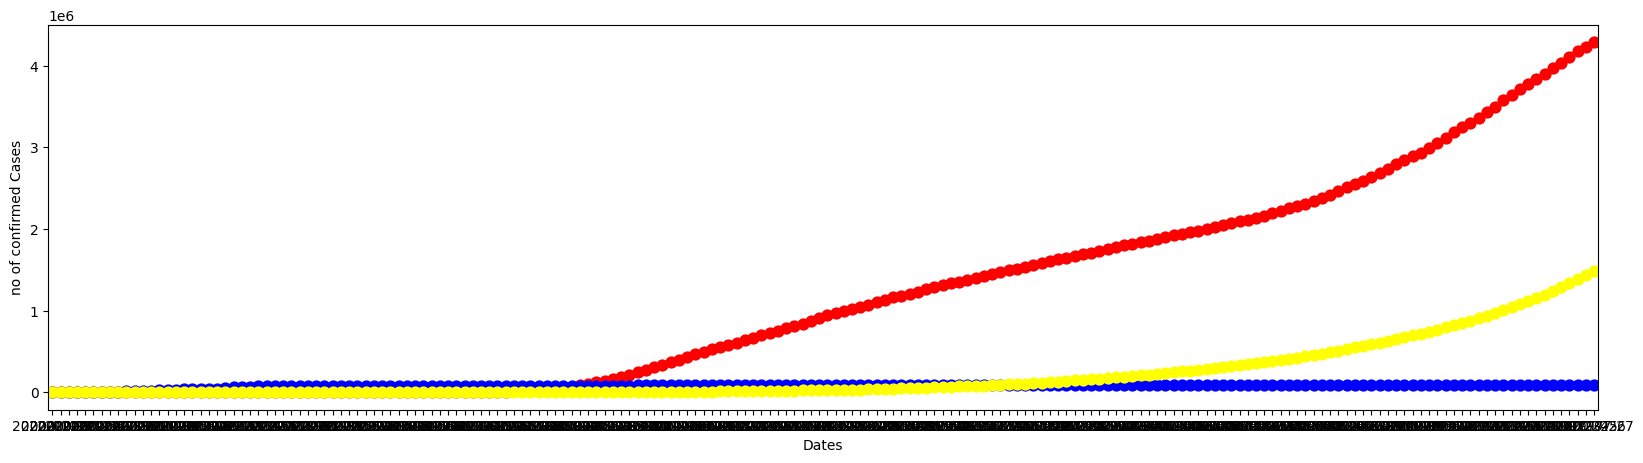

In [41]:
plt.figure(figsize=(20,5))
sns.pointplot(data=US,x='Date',y='Confirmed',color='Red')
sns.pointplot(data=China,x='Date',y='Confirmed',color='Blue')
sns.pointplot(data=India,x='Date',y='Confirmed',color='Yellow')

plt.ylabel('no of confirmed Cases')
plt.xlabel('Dates')
plt.show()

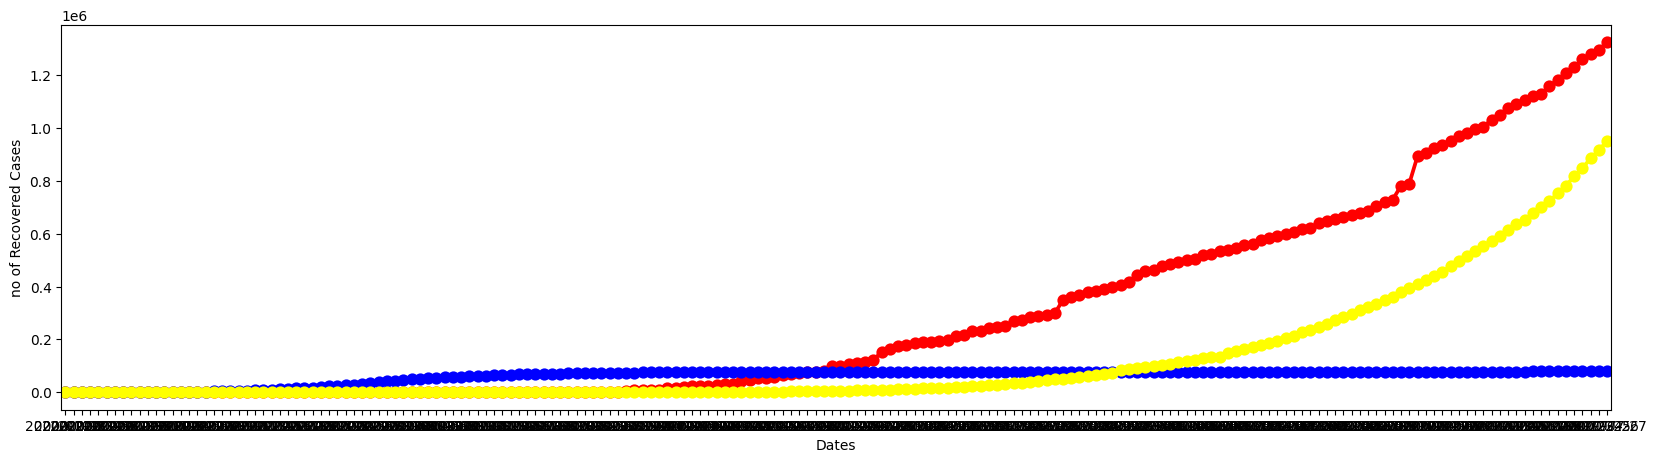

In [42]:
plt.figure(figsize=(20,5))
sns.pointplot(data=US,x='Date',y='Recovered',color='Red')
sns.pointplot(data=China,x='Date',y='Recovered',color='Blue')
sns.pointplot(data=India,x='Date',y='Recovered',color='Yellow')

plt.ylabel('no of Recovered Cases')
plt.xlabel('Dates')
plt.show()

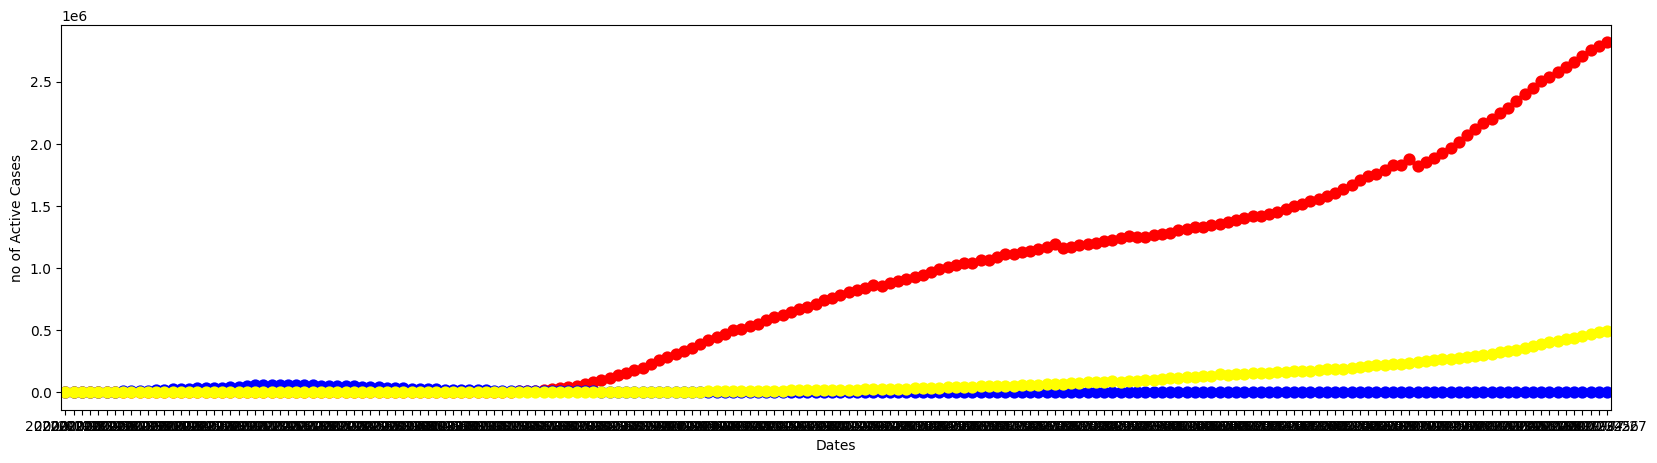

In [43]:
plt.figure(figsize=(20,5))
sns.pointplot(data=US,x='Date',y='Active',color='Red')
sns.pointplot(data=China,x='Date',y='Active',color='Blue')
sns.pointplot(data=India,x='Date',y='Active',color='Yellow')

plt.ylabel('no of Active Cases')
plt.xlabel('Dates')
plt.show()

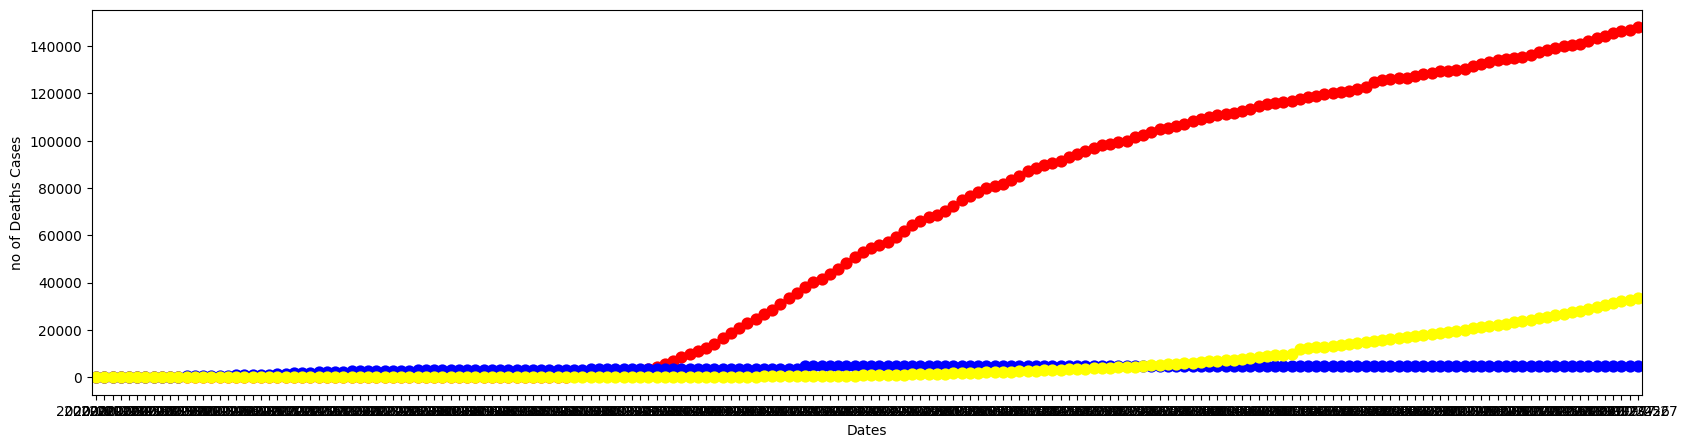

In [44]:
plt.figure(figsize=(20,5))
sns.pointplot(data=US,x='Date',y='Deaths',color='Red')
sns.pointplot(data=China,x='Date',y='Deaths',color='Blue')
sns.pointplot(data=India,x='Date',y='Deaths',color='Yellow')

plt.ylabel('no of Deaths Cases')
plt.xlabel('Dates')
plt.show()

# Model Bulding

In [45]:
# Intalling prophet
!pip install prophet

'''
Prophet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range
of time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes
important dates or events that can impact the forecast.
'''


# be back by 9:50

'\nProphet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range\nof time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes\nimportant dates or events that can impact the forecast.\n'

In [46]:
# the columns names should me ds and y and its madatory
confirmed_cases=df.groupby(['Date']).sum()['Confirmed'].reset_index()

In [47]:
confirmed_cases.columns=['ds','y']
confirmed_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [48]:
from prophet import Prophet

In [49]:
model=Prophet()

In [50]:
model.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/8ec3uz7a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/tisfuzix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50623', 'data', 'file=/tmp/tmpa9usbbu9/8ec3uz7a.json', 'init=/tmp/tmpa9usbbu9/tisfuzix.json', 'output', 'file=/tmp/tmpa9usbbu9/prophet_modelvxmdjpzr/prophet_model-20250808075109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
future=model.make_future_dataframe(periods=7)
forcasted=model.predict(future)
forcasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.154116e+05,8.084061e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.135847e+05,1.007121e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.012859e+05,1.050485e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.034091e+04,1.143888e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.079416e+05,1.108360e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.664138e+07,1.684967e+07,1.673903e+07,1.675231e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684396e+07,1.706813e+07,1.693520e+07,1.696229e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.706327e+07,1.727696e+07,1.713048e+07,1.717679e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724509e+07,1.747307e+07,1.732516e+07,1.739251e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [52]:
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''

'\nds:\nThis column contains the dates for which the predictions have been made. It stands for "date stamp."\n\nyhat:\nThis is the predicted value (forecast) for the given date in the ds column. It represents the model\'s best estimate for that point in time.\n\nyhat_upper:\nThis column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.\nIt suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction\'s uncertainty.\n\nyhat_lower:\nThis column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.\n'

In [53]:
forcasted[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-1.154116e+05,-2.067684e+04,8.084061e+04
1,-1.135847e+05,-8.050948e+03,1.007121e+05
2,-1.012859e+05,5.827455e+03,1.050485e+05
3,-9.034091e+04,1.217668e+04,1.143888e+05
4,-1.079416e+05,8.405020e+03,1.108360e+05
...,...,...,...
190,1.664138e+07,1.674391e+07,1.684967e+07
191,1.684396e+07,1.695910e+07,1.706813e+07
192,1.706327e+07,1.716676e+07,1.727696e+07
193,1.724509e+07,1.736430e+07,1.747307e+07


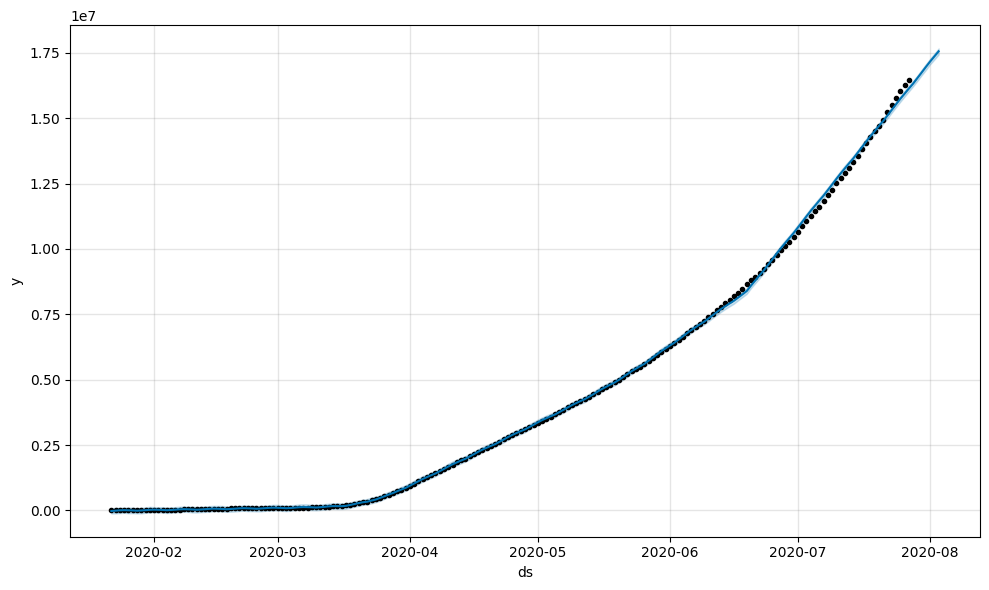

In [54]:
model.plot(forcasted)
plt.show()

In [55]:
# from Manish Mohan to everyone:    10:10 PM
recovered_cases.columns=['ds','y']
# recovered_cases
model_recovered=Prophet()
model_recovered.fit(recovered_cases)
future=model_recovered.make_future_dataframe(periods=7)
forcasted=model_recovered.predict(future)
forcasted

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/zoe14g9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/j1ex5bfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42314', 'data', 'file=/tmp/tmpa9usbbu9/zoe14g9o.json', 'init=/tmp/tmpa9usbbu9/j1ex5bfe.json', 'output', 'file=/tmp/tmpa9usbbu9/prophet_modelc07qmb4h/prophet_model-20250808075109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.360148e+04,-9.658501e+04,6.027080e+04,-1.360148e+04,-1.360148e+04,-4840.630407,-4840.630407,-4840.630407,-4840.630407,-4840.630407,-4840.630407,0.0,0.0,0.0,-1.844211e+04
1,2020-01-23,-1.243665e+04,-8.688303e+04,7.010120e+04,-1.243665e+04,-1.243665e+04,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,0.0,0.0,0.0,-1.118185e+04
2,2020-01-24,-1.127183e+04,-8.695709e+04,6.843726e+04,-1.127183e+04,-1.127183e+04,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,0.0,0.0,0.0,-5.175679e+03
3,2020-01-25,-1.010701e+04,-8.000827e+04,7.477073e+04,-1.010701e+04,-1.010701e+04,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,0.0,0.0,0.0,-4.075673e+02
4,2020-01-26,-8.942184e+03,-8.723294e+04,7.388133e+04,-8.942184e+03,-8.942184e+03,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,0.0,0.0,0.0,-9.825667e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,9.594528e+06,9.510989e+06,9.669921e+06,9.591556e+06,9.597761e+06,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,0.0,0.0,0.0,9.595783e+06
191,2020-07-31,9.731086e+06,9.649153e+06,9.811499e+06,9.723620e+06,9.738352e+06,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,0.0,0.0,0.0,9.737182e+06
192,2020-08-01,9.867644e+06,9.791265e+06,9.960446e+06,9.855552e+06,9.878644e+06,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,0.0,0.0,0.0,9.877343e+06
193,2020-08-02,1.000420e+07,9.921067e+06,1.008945e+07,9.985334e+06,1.002111e+07,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,0.0,0.0,0.0,1.000332e+07


In [56]:
# from Manish Mohan to everyone:    10:10 PM
active_cases.columns=['ds','y']
# recovered_cases
model_active=Prophet()
model_active.fit(active_cases)
future=model_active.make_future_dataframe(periods=7)
forcasted=model_active.predict(future)
forcasted

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/0h1bken4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/0nm0lyed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41986', 'data', 'file=/tmp/tmpa9usbbu9/0h1bken4.json', 'init=/tmp/tmpa9usbbu9/0nm0lyed.json', 'output', 'file=/tmp/tmpa9usbbu9/prophet_modele0nb2g0c/prophet_model-20250808075109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.051890e+02,-5.215682e+04,3.800339e+04,-5.051890e+02,-5.051890e+02,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,0.0,0.0,0.0,-6.240003e+03
1,2020-01-23,1.357199e+03,-4.508919e+04,4.739474e+04,1.357199e+03,1.357199e+03,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,-1.186216e+03
2,2020-01-24,3.219587e+03,-3.769714e+04,5.430530e+04,3.219587e+03,3.219587e+03,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.450374e+03
3,2020-01-25,5.081975e+03,-3.408881e+04,5.399060e+04,5.081975e+03,5.081975e+03,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,8.209979e+03
4,2020-01-26,6.944363e+03,-2.960719e+04,6.062275e+04,6.944363e+03,6.944363e+03,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,1.509628e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,6.483817e+06,6.431364e+06,6.528265e+06,6.481339e+06,6.486726e+06,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,6.481274e+06
191,2020-07-31,6.546085e+06,6.504765e+06,6.598335e+06,6.541452e+06,6.552383e+06,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.549315e+06
192,2020-08-01,6.608352e+06,6.565969e+06,6.659137e+06,6.599943e+06,6.618232e+06,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,6.611480e+06
193,2020-08-02,6.670619e+06,6.629382e+06,6.726492e+06,6.657723e+06,6.684518e+06,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,6.678771e+06


In [57]:
# from Manish Mohan to everyone:    10:10 PM
death_cases.columns=['ds','y']
# recovered_cases
model_death=Prophet()
model_death.fit(death_cases)
future=model_death.make_future_dataframe(periods=7)
forcasted=model_death.predict(future)
forcasted

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/ti6kettd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9usbbu9/smxu8dpf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5047', 'data', 'file=/tmp/tmpa9usbbu9/ti6kettd.json', 'init=/tmp/tmpa9usbbu9/smxu8dpf.json', 'output', 'file=/tmp/tmpa9usbbu9/prophet_modeluxnqjdwl/prophet_model-20250808075109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-2651.528554,1375.614051,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-2018.266936,2114.989826,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-1329.614598,2498.611006,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-1468.135371,2369.624398,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-2270.484339,1644.579245,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,663102.723561,661509.769651,665678.241536,662914.271222,663352.856693,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,663491.395651
191,2020-07-31,668132.130984,666853.588797,671290.765307,667649.009236,668660.211367,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,669006.394312
192,2020-08-01,673161.538407,671527.358735,676202.988791,672346.351198,674041.274912,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,673888.426957
193,2020-08-02,678190.945830,675529.515218,680745.576019,676985.422523,679501.552708,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,678025.345020


In [58]:
import plotly

In [59]:
import plotly.express as px

In [60]:
world=df.groupby(['Country'])[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
world

,Country,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [61]:
figure=px.choropleth(world,locations='Country',locationmode='country names',color='Active',hover_name='Country',range_color=[1,100000],color_continuous_scale='reds',title='World map for the Active cases')
figure.show()
